In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100, 'display.max_rows', 100)

In [3]:
oski = pd.read_csv('../../1-data-collection/data/oski.csv')
vati = pd.read_csv('../../1-data-collection/data/vati.csv')
monkeymoon = pd.read_csv('../../1-data-collection/data/monkeymoon.csv')

In [4]:
boay = pd.read_csv('../../1-data-collection/data/boay00.csv')
vinu = pd.read_csv('../../1-data-collection/data/vinu.csv')
eden = pd.read_csv('../../1-data-collection/data/eden.csv')


In [5]:
oski_mean = oski.describe().T[['mean']].rename(columns = {'mean' : 'oski'})
vati_mean = vati.describe().T[['mean']].rename(columns = {'mean' : 'vati'})
monk_mean = monkeymoon.describe().T[['mean']].rename(columns = {'mean' : 'monkeymoon'})
boay_mean = boay.describe().T[['mean']].rename(columns = {'mean' : 'boay'})
vinu_mean = vinu.describe().T[['mean']].rename(columns = {'mean' : 'vinu'})
eden_mean = eden.describe().T[['mean']].rename(columns = {'mean' : 'eden'})


In [6]:
oski_mean.shape

(82, 1)

In [7]:
boay_mean.shape

(82, 1)

In [8]:
pros = pd.concat([oski_mean, vati_mean, monk_mean, boay_mean, vinu_mean, eden_mean], axis = 1)

In [9]:
pros.shape

(83, 6)

In [10]:
pros

,oski,vati,monkeymoon,boay,vinu,eden
shots,3.000000,2.968750,3.288538,2.263158,1.794118,2.300000
shots_against,6.775385,6.895833,7.671937,8.105263,7.764706,6.540000
goals,0.818462,0.770833,0.877470,1.000000,0.558824,0.700000
goals_against,1.747692,1.596354,2.000000,3.052632,2.588235,1.980000
saves,1.258462,1.544271,1.984190,1.000000,1.176471,0.880000
assists,0.495385,0.627604,0.612648,0.263158,0.470588,0.480000
score,356.544615,384.794271,451.418972,298.684211,274.029412,302.180000
shooting_percentage,26.631135,24.980985,24.702359,45.087719,32.843137,26.166666
bpm,494.030769,424.106771,408.790514,380.894737,354.676471,425.100000
bcpm,497.376185,435.693972,422.106681,383.246965,369.229747,437.948231


In [11]:
pros = pros.T

In [12]:
boay.mvp.value_counts(normalize = True)

False    1.0
Name: mvp, dtype: float64

In [13]:
# pros['mvp'] = [oski.mvp.value_counts(normalize = True)[1],vati.mvp.value_counts(normalize = True)[1],
#               monkeymoon.mvp.value_counts(normalize = True)[1], boay.mvp.value_counts(normalize = True)[1]]

In [14]:
pros.drop(columns = 'goals_against_while_last_defender', inplace = True)

In [15]:
pros = pros.T

In [16]:
pros.shape

(82, 6)

In [17]:
pros

,oski,vati,monkeymoon,boay,vinu,eden
shots,3.000000,2.968750,3.288538,2.263158,1.794118,2.300000
shots_against,6.775385,6.895833,7.671937,8.105263,7.764706,6.540000
goals,0.818462,0.770833,0.877470,1.000000,0.558824,0.700000
goals_against,1.747692,1.596354,2.000000,3.052632,2.588235,1.980000
saves,1.258462,1.544271,1.984190,1.000000,1.176471,0.880000
assists,0.495385,0.627604,0.612648,0.263158,0.470588,0.480000
score,356.544615,384.794271,451.418972,298.684211,274.029412,302.180000
shooting_percentage,26.631135,24.980985,24.702359,45.087719,32.843137,26.166666
bpm,494.030769,424.106771,408.790514,380.894737,354.676471,425.100000
bcpm,497.376185,435.693972,422.106681,383.246965,369.229747,437.948231


In [18]:
pros = pros.T

In [19]:
to_drop = [
    'shots_against',
    'goals_against',
    'shooting_percentage',
    'bpm',
    'amount_stolen_big',
    'amount_stolen_small',
    'count_collected_big',
    'count_collected_small',
    'count_stolen_small',
    'count_stolen_big',
    'amount_overfill_stolen',
    'time_zero_boost',
    'time_full_boost',
    'time_boost_0_25',
    'time_boost_25_50',
    'time_boost_50_75',
    'time_boost_75_100',
    'avg_speed',
    'total_distance',
    'time_supersonic_speed',
    'time_boost_speed',
    'time_slow_speed',
    'time_ground',
    'time_low_air',
    'time_high_air',
    'time_powerslide',
    'time_defensive_third',
    'time_neutral_third',
    'time_offensive_third',
    'time_defensive_half',
    'time_offensive_half',
    'time_behind_ball',
    'time_infront_ball',
    'time_most_back',
    'time_most_forward',
    'time_closest_to_ball',
    'time_farthest_from_ball'
]

In [20]:
pros.drop(columns = to_drop, inplace = True)

In [21]:
pros = pros.T

In [22]:
pros

,oski,vati,monkeymoon,boay,vinu,eden
shots,3.000000,2.968750,3.288538,2.263158,1.794118,2.300000
goals,0.818462,0.770833,0.877470,1.000000,0.558824,0.700000
saves,1.258462,1.544271,1.984190,1.000000,1.176471,0.880000
assists,0.495385,0.627604,0.612648,0.263158,0.470588,0.480000
score,356.544615,384.794271,451.418972,298.684211,274.029412,302.180000
bcpm,497.376185,435.693972,422.106681,383.246965,369.229747,437.948231
avg_amount,47.051446,51.442031,51.636206,47.414737,50.387647,49.261600
amount_collected,2706.264615,2436.658854,2512.790514,2145.000000,2061.411765,2309.500000
amount_stolen,672.058462,559.830729,548.011858,407.315789,530.382353,403.220000
amount_collected_big,1946.938462,1719.278646,1697.126482,1530.368421,1341.705882,1677.840000


In [23]:
mm = pros[['monkeymoon']]

In [24]:
mm

,monkeymoon
shots,3.288538
goals,0.877470
saves,1.984190
assists,0.612648
score,451.418972
bcpm,422.106681
avg_amount,51.636206
amount_collected,2512.790514
amount_stolen,548.011858
amount_collected_big,1697.126482


In [25]:
metrics = {}
metrics['speed'] = {}
metrics['boost_efficiency'] = {}
metrics['aggression'] = {}
metrics['team_cohesion'] = {}
metrics['game_involvement'] = {}

In [26]:
speed = ['count_powerslide', 
         'percent_supersonic_speed', 
         'avg_speed_percentage', 
         'percent_slow_speed',
         'percent_high_air',
         'percent_low_air',
         'percent_ground',
         'bcpm'
        ]

boost_efficiency = ['bcpm',
                    'avg_amount',
                    'amount_collected',
                    'amount_collected_big',
                    'amount_collected_small',
                    'amount_overfill',
                    'amount_used_while_supersonic',
                    'percent_zero_boost',
                    'percent_full_boost',
                    'percent_boost_0_25',
                    'percent_boost_25_50',
                    'percent_boost_50_75',
                    'percent_boost_75_100',
                    'avg_powerslide_duration',
                    'avg_speed_percentage',
                    'percent_boost_speed',
                    'percent_ground',
                    'percent_low_air',
                    'percent_high_air'
]

aggression = ['amount_stolen',
              'amount_used_while_supersonic',
              'avg_distance_to_mates',
              'inflicted',
              'percent_defensive_third',
              'percent_offensive_third',
              'percent_infront_ball',
              'percent_most_back',
              'percent_most_forward'
]

team_cohesion = ['goals',
                 'assists',
                 'amount_collected_big',
                 'amount_collected_small',
                 'avg_distance_to_ball_possession',
                 'avg_distance_to_ball_no_possession',
                 'avg_distance_to_mates'
]

game_involvement = ['score',
                    'amount_collected',
                    'amount_stolen',
                    'percent_low_air',
                    'percent_ground',
                    'avg_distance_to_ball_possession',
                    'avg_distance_to_ball_no_possession',
                    'percent_closest_to_ball',
                    'percent_farthest_from_ball',
                    'inflicted'
]

In [27]:
pros = pros.T

In [28]:
speed_df = pros.loc[:, speed]
boost_efficiency_df = pros.loc[:, boost_efficiency]
aggression_df = pros.loc[:, aggression]
team_cohesion_df = pros.loc[:, team_cohesion]
game_involvement_df = pros.loc[:, game_involvement]

In [29]:
speed_df['speed'] = (speed_df.count_powerslide / 2
                    ) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                    ) * 100) + (speed_df.avg_speed_percentage / 2
                    ) + (speed_df.percent_high_air * 5
                    ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 35
                    ) + (speed_df.bcpm / 15)

speed_df['speed'] = speed_df['speed'] / max(speed_df.speed) * 9.5

In [30]:
speed_df

,count_powerslide,percent_supersonic_speed,avg_speed_percentage,percent_slow_speed,percent_high_air,percent_low_air,percent_ground,bcpm,speed
oski,72.335385,23.238157,72.287893,36.667189,7.588786,40.737867,51.057962,497.376185,9.500000
vati,62.471354,20.384203,69.720222,41.092010,6.852308,41.476687,51.671005,435.693972,8.382462
monkeymoon,50.260870,15.647610,67.112734,45.365997,6.726940,36.338459,56.934602,422.106681,7.175835
boay,65.368421,12.778512,65.999999,46.410296,3.720180,38.111800,58.168020,383.246965,6.488099
vinu,46.970588,11.346449,63.783887,50.844386,4.671433,37.575428,57.753138,369.229747,6.007938
eden,61.420000,16.416315,66.682608,45.646880,5.209482,37.620173,57.170346,437.948231,7.216215


In [31]:
boost_efficiency_df['boost_efficiency'] = (boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
                                          ) + ((boost_efficiency_df.avg_speed_percentage / boost_efficiency_df.bcpm
                                          ) * 40) + ((100 / boost_efficiency_df.amount_overfill
                                          ) * 20) + ((100 / boost_efficiency_df.amount_used_while_supersonic
                                          ) * 20) + (60 / boost_efficiency_df.percent_zero_boost
                                          ) + (60 / boost_efficiency_df.percent_full_boost
                                          ) + (((boost_efficiency_df.percent_boost_25_50
                                               + boost_efficiency_df.percent_boost_50_75)
                                               / (boost_efficiency_df.percent_boost_0_25
                                              + boost_efficiency_df.percent_boost_75_100)
                                          ) * 10
                                          ) + (abs(0.1 - boost_efficiency_df.avg_powerslide_duration
                                          ) * 10
                                          )
                                          
                                          

boost_efficiency_df['boost_efficiency'] = (boost_efficiency_df.boost_efficiency / max(boost_efficiency_df.boost_efficiency
                                                                                    )) * 9.5

In [32]:
boost_efficiency_df

,bcpm,avg_amount,amount_collected,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,percent_boost_0_25,percent_boost_25_50,percent_boost_50_75,percent_boost_75_100,avg_powerslide_duration,avg_speed_percentage,percent_boost_speed,percent_ground,percent_low_air,percent_high_air,boost_efficiency
oski,497.376185,47.051446,2706.264615,1946.938462,759.326154,332.941538,439.753846,15.317802,9.959190,39.770842,20.118585,15.243598,24.251590,0.110092,72.287893,39.479269,51.057962,40.737867,7.588786,7.263893
vati,435.693972,51.442031,2436.658854,1719.278646,717.380208,397.833333,306.440104,12.243709,13.080054,32.230267,19.784638,16.836697,30.627565,0.112552,69.720222,38.523788,51.671005,41.476687,6.852308,7.596056
monkeymoon,422.106681,51.636206,2512.790514,1697.126482,815.664032,311.067194,324.976285,9.837549,9.975981,32.405493,20.995220,18.468815,28.130473,0.118775,67.112734,38.986393,56.934602,36.338459,6.726940,8.588242
boay,383.246965,47.414737,2145.000000,1530.368421,614.631579,271.421053,270.631579,12.752482,7.179824,34.530883,23.333813,17.987325,24.147980,0.109474,65.999999,40.811191,58.168020,38.111800,3.720180,9.500000
vinu,369.229747,50.387647,2061.411765,1341.705882,719.705882,367.000000,188.705882,10.631813,11.657511,34.701992,20.748593,16.347621,28.201793,0.115000,63.783887,37.809165,57.753138,37.575428,4.671433,9.051888
eden,437.948231,49.261600,2309.500000,1677.840000,631.660000,337.400000,336.540000,13.443794,11.799276,36.787731,19.536056,17.071095,26.605117,0.127800,66.682608,37.936804,57.170346,37.620173,5.209482,7.629195


In [33]:
aggression_df

,amount_stolen,amount_used_while_supersonic,avg_distance_to_mates,inflicted,percent_defensive_third,percent_offensive_third,percent_infront_ball,percent_most_back,percent_most_forward
oski,672.058462,439.753846,3756.556923,1.018462,42.472912,24.311262,30.194174,31.686104,36.376107
vati,559.830729,306.440104,3655.294271,0.908854,46.198045,21.948750,27.724472,35.928961,34.646231
monkeymoon,548.011858,324.976285,3538.628458,0.980237,47.893841,20.597128,25.622365,37.515347,31.003726
boay,407.315789,270.631579,3433.789474,0.473684,50.136816,19.443422,28.815572,31.861957,34.620148
vinu,530.382353,188.705882,3445.911765,0.852941,46.295143,22.894023,29.468781,29.596441,35.844383
eden,403.220000,336.540000,3722.740000,1.140000,50.700708,19.290744,25.672704,38.149095,31.502161


In [34]:
aggression_df['aggression'] = (aggression_df.amount_stolen / 100
                              ) + (aggression_df.amount_used_while_supersonic / 100
                              ) + (aggression_df.avg_distance_to_mates / 40
                              ) + (aggression_df.inflicted * 6
                              ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
                              ) * 10
                              ) + (aggression_df.percent_infront_ball / 10
                              ) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
                              ) * 10)

aggression_df['aggression'] = (aggression_df.aggression / max(aggression_df.aggression
                                                                                    )) * 9.5

In [35]:
aggression_df

,amount_stolen,amount_used_while_supersonic,avg_distance_to_mates,inflicted,percent_defensive_third,percent_offensive_third,percent_infront_ball,percent_most_back,percent_most_forward,aggression
oski,672.058462,439.753846,3756.556923,1.018462,42.472912,24.311262,30.194174,31.686104,36.376107,9.500000
vati,559.830729,306.440104,3655.294271,0.908854,46.198045,21.948750,27.724472,35.928961,34.646231,8.870721
monkeymoon,548.011858,324.976285,3538.628458,0.980237,47.893841,20.597128,25.622365,37.515347,31.003726,8.548150
boay,407.315789,270.631579,3433.789474,0.473684,50.136816,19.443422,28.815572,31.861957,34.620148,8.178430
vinu,530.382353,188.705882,3445.911765,0.852941,46.295143,22.894023,29.468781,29.596441,35.844383,8.566618
eden,403.220000,336.540000,3722.740000,1.140000,50.700708,19.290744,25.672704,38.149095,31.502161,8.818017


In [36]:
team_cohesion_df

,goals,assists,amount_collected_big,amount_collected_small,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,avg_distance_to_mates
oski,0.818462,0.495385,1946.938462,759.326154,2602.575385,2984.086154,3756.556923
vati,0.770833,0.627604,1719.278646,717.380208,2693.927083,3009.307292,3655.294271
monkeymoon,0.877470,0.612648,1697.126482,815.664032,2671.644269,2888.332016,3538.628458
boay,1.000000,0.263158,1530.368421,614.631579,2834.631579,2817.052632,3433.789474
vinu,0.558824,0.470588,1341.705882,719.705882,2528.588235,2731.235294,3445.911765
eden,0.700000,0.480000,1677.840000,631.660000,2791.740000,3039.100000,3722.740000


In [37]:
team_cohesion_df['team_cohesion'] = ((team_cohesion_df.assists / team_cohesion_df.goals
                                    ) * 10 
                                    ) + ((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
                                    ) * 12
                                    ) + (team_cohesion_df.avg_distance_to_mates / 500)

team_cohesion_df['team_cohesion'] = (team_cohesion_df.team_cohesion / max(team_cohesion_df.team_cohesion
                                                                                    )) * 9.5

In [38]:
team_cohesion_df

,goals,assists,amount_collected_big,amount_collected_small,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,avg_distance_to_mates,team_cohesion
oski,0.818462,0.495385,1946.938462,759.326154,2602.575385,2984.086154,3756.556923,7.969530
vati,0.770833,0.627604,1719.278646,717.380208,2693.927083,3009.307292,3655.294271,8.936437
monkeymoon,0.877470,0.612648,1697.126482,815.664032,2671.644269,2888.332016,3538.628458,8.659977
boay,1.000000,0.263158,1530.368421,614.631579,2834.631579,2817.052632,3433.789474,6.254172
vinu,0.558824,0.470588,1341.705882,719.705882,2528.588235,2731.235294,3445.911765,9.500000
eden,0.700000,0.480000,1677.840000,631.660000,2791.740000,3039.100000,3722.740000,8.220428


In [39]:
game_involvement_df

,score,amount_collected,amount_stolen,percent_low_air,percent_ground,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,percent_closest_to_ball,percent_farthest_from_ball,inflicted
oski,356.544615,2706.264615,672.058462,40.737867,51.057962,2602.575385,2984.086154,35.469758,32.276338,1.018462
vati,384.794271,2436.658854,559.830729,41.476687,51.671005,2693.927083,3009.307292,32.862843,37.382930,0.908854
monkeymoon,451.418972,2512.790514,548.011858,36.338459,56.934602,2671.644269,2888.332016,34.045967,34.272065,0.980237
boay,298.684211,2145.000000,407.315789,38.111800,58.168020,2834.631579,2817.052632,31.353547,35.977744,0.473684
vinu,274.029412,2061.411765,530.382353,37.575428,57.753138,2528.588235,2731.235294,37.060313,28.559580,0.852941
eden,302.180000,2309.500000,403.220000,37.620173,57.170346,2791.740000,3039.100000,34.704954,32.835403,1.140000


In [40]:
game_involvement_df['game_involvement'] = (game_involvement_df.score / 100
                                          ) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
                                          ) * 200
                                          ) + ((100 - game_involvement_df.percent_ground
                                          ) / 10
                                          ) + ((33.33 - game_involvement_df.percent_closest_to_ball
                                          ) * -1
                                          ) + (game_involvement_df.inflicted
                                          ) * 5

game_involvement_df['game_involvement'] = (game_involvement_df.game_involvement / max(game_involvement_df.game_involvement
                                                                                    )) * 9

In [41]:
game_involvement_df

,score,amount_collected,amount_stolen,percent_low_air,percent_ground,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,percent_closest_to_ball,percent_farthest_from_ball,inflicted,game_involvement
oski,356.544615,2706.264615,672.058462,40.737867,51.057962,2602.575385,2984.086154,35.469758,32.276338,1.018462,8.856421
vati,384.794271,2436.658854,559.830729,41.476687,51.671005,2693.927083,3009.307292,32.862843,37.382930,0.908854,7.955320
monkeymoon,451.418972,2512.790514,548.011858,36.338459,56.934602,2671.644269,2888.332016,34.045967,34.272065,0.980237,7.866840
boay,298.684211,2145.000000,407.315789,38.111800,58.168020,2834.631579,2817.052632,31.353547,35.977744,0.473684,6.170925
vinu,274.029412,2061.411765,530.382353,37.575428,57.753138,2528.588235,2731.235294,37.060313,28.559580,0.852941,9.000000
eden,302.180000,2309.500000,403.220000,37.620173,57.170346,2791.740000,3039.100000,34.704954,32.835403,1.140000,6.680144


In [42]:
boost_efficiency_df

,bcpm,avg_amount,amount_collected,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,percent_boost_0_25,percent_boost_25_50,percent_boost_50_75,percent_boost_75_100,avg_powerslide_duration,avg_speed_percentage,percent_boost_speed,percent_ground,percent_low_air,percent_high_air,boost_efficiency
oski,497.376185,47.051446,2706.264615,1946.938462,759.326154,332.941538,439.753846,15.317802,9.959190,39.770842,20.118585,15.243598,24.251590,0.110092,72.287893,39.479269,51.057962,40.737867,7.588786,7.263893
vati,435.693972,51.442031,2436.658854,1719.278646,717.380208,397.833333,306.440104,12.243709,13.080054,32.230267,19.784638,16.836697,30.627565,0.112552,69.720222,38.523788,51.671005,41.476687,6.852308,7.596056
monkeymoon,422.106681,51.636206,2512.790514,1697.126482,815.664032,311.067194,324.976285,9.837549,9.975981,32.405493,20.995220,18.468815,28.130473,0.118775,67.112734,38.986393,56.934602,36.338459,6.726940,8.588242
boay,383.246965,47.414737,2145.000000,1530.368421,614.631579,271.421053,270.631579,12.752482,7.179824,34.530883,23.333813,17.987325,24.147980,0.109474,65.999999,40.811191,58.168020,38.111800,3.720180,9.500000
vinu,369.229747,50.387647,2061.411765,1341.705882,719.705882,367.000000,188.705882,10.631813,11.657511,34.701992,20.748593,16.347621,28.201793,0.115000,63.783887,37.809165,57.753138,37.575428,4.671433,9.051888
eden,437.948231,49.261600,2309.500000,1677.840000,631.660000,337.400000,336.540000,13.443794,11.799276,36.787731,19.536056,17.071095,26.605117,0.127800,66.682608,37.936804,57.170346,37.620173,5.209482,7.629195


In [43]:
boost_efficiency_df.avg_amount * (((boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
                                          ) * 25) + ((boost_efficiency_df.bcpm / boost_efficiency_df.avg_speed_percentage
                                          )) + (1 / (boost_efficiency_df.amount_overfill / boost_efficiency_df.amount_collected)
                                          ) + (0.8 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
                                          ) + (75 / boost_efficiency_df.percent_zero_boost
                                          ) + (1 - (abs(boost_efficiency_df.avg_powerslide_duration - 0.1
                                          )) * 100) + (((boost_efficiency_df.percent_boost_50_75
                                                + boost_efficiency_df.percent_boost_75_100)
                                               / (boost_efficiency_df.percent_boost_0_25
                                                + boost_efficiency_df.percent_boost_25_50)
                                              ) * 10)
) / 250

oski          7.232431
vati          8.455218
monkeymoon    9.117117
boay          7.667801
vinu          8.759696
eden          7.348555
dtype: float64

In [44]:
(0.8 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
                                          )

oski          4.923235
vati          6.361201
monkeymoon    6.185782
boay          6.340723
vinu          8.739152
eden          5.489986
dtype: float64

In [45]:
(((boost_efficiency_df.percent_boost_50_75
                                                + boost_efficiency_df.percent_boost_75_100)
                                               / (boost_efficiency_df.percent_boost_0_25
                                                + boost_efficiency_df.percent_boost_25_50)
                                              ) * 10)

oski          6.594685
vati          9.125127
monkeymoon    8.726342
boay          7.281695
vinu          8.034075
eden          7.754488
dtype: float64

In [46]:
(1 - (abs(boost_efficiency_df.avg_powerslide_duration - 0.1
                                          )) * 10
                                          ) * 10

oski          8.990769
vati          8.744792
monkeymoon    8.122530
boay          9.052632
vinu          8.500000
eden          7.220000
Name: avg_powerslide_duration, dtype: float64

In [47]:
((100 / boost_efficiency_df.percent_boost_speed) * boost_efficiency_df.avg_speed_percentage
                                          ) / 20

oski          9.155171
vati          9.048983
monkeymoon    8.607200
boay          8.086017
vinu          8.434977
eden          8.788643
dtype: float64

In [48]:
(speed_df.count_powerslide / 10
                    ) + (speed_df.count_powerslide / 10
                    ) + (speed_df.avg_speed_percentage / 10
                    ) + (speed_df.percent_high_air
                    ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 9
                    ) + (speed_df.bcpm / 66) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                    ) * 15)

oski          53.507913
vati          47.585326
monkeymoon    40.803975
boay          39.227522
vinu          35.241327
eden          42.114208
dtype: float64

In [50]:
(speed_df.count_powerslide / 10
                    ) 

oski          7.233538
vati          6.247135
monkeymoon    5.026087
boay          6.536842
vinu          4.697059
eden          6.142000
Name: count_powerslide, dtype: float64

In [51]:
((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                    ) * 15)

oski          9.506383
vati          7.440937
monkeymoon    5.173790
boay          4.130068
vinu          3.347405
eden          5.394558
dtype: float64

In [52]:
(speed_df.avg_speed_percentage
                    ) / 10

oski          7.228789
vati          6.972022
monkeymoon    6.711273
boay          6.600000
vinu          6.378389
eden          6.668261
Name: avg_speed_percentage, dtype: float64

In [53]:
(speed_df.percent_high_air
                    )

oski          7.588786
vati          6.852308
monkeymoon    6.726940
boay          3.720180
vinu          4.671433
eden          5.209482
Name: percent_high_air, dtype: float64

In [54]:
((speed_df.percent_low_air / speed_df.percent_ground) * 9
)

oski          7.180874
vati          7.224365
monkeymoon    5.744242
boay          5.896817
vinu          5.855593
eden          5.922328
dtype: float64

In [55]:
(speed_df.bcpm / 66)

oski          7.536003
vati          6.601424
monkeymoon    6.395556
boay          5.806772
vinu          5.594390
eden          6.635579
Name: bcpm, dtype: float64

In [56]:
(aggression_df.amount_stolen / 100
                              ) + ((aggression_df.amount_used_while_supersonic / 100
                              ) * 1.66) + (aggression_df.avg_distance_to_mates / 540
                              ) + (aggression_df.inflicted * 6
                              ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
                              ) * 12) + ((aggression_df.percent_infront_ball / 10
                              ) * 2.2) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
                              ) * 6)

oski          47.487394
vati          40.493790
monkeymoon    39.065347
boay          35.279131
vinu          39.619344
eden          38.521101
dtype: float64

In [57]:
(aggression_df.amount_stolen / 100
                              )

oski          6.720585
vati          5.598307
monkeymoon    5.480119
boay          4.073158
vinu          5.303824
eden          4.032200
Name: amount_stolen, dtype: float64

In [58]:
(aggression_df.amount_used_while_supersonic / 100
                              ) * 1.66

oski          7.299914
vati          5.086906
monkeymoon    5.394606
boay          4.492484
vinu          3.132518
eden          5.586564
Name: amount_used_while_supersonic, dtype: float64

In [59]:
(aggression_df.avg_distance_to_mates / 540
                              ) 

oski          6.956587
vati          6.769063
monkeymoon    6.553016
boay          6.358869
vinu          6.381318
eden          6.893963
Name: avg_distance_to_mates, dtype: float64

In [60]:
(aggression_df.inflicted * 6
                              )

oski          6.110769
vati          5.453125
monkeymoon    5.881423
boay          2.842105
vinu          5.117647
eden          6.840000
Name: inflicted, dtype: float64

In [61]:
((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third)
        ) * 12

oski          6.868734
vati          5.701215
monkeymoon    5.160696
boay          4.653687
vinu          5.934279
eden          4.565793
dtype: float64

In [62]:
(aggression_df.percent_infront_ball / 10
                              ) * 2.2

oski          6.642718
vati          6.099384
monkeymoon    5.636920
boay          6.339426
vinu          6.483132
eden          5.647995
Name: percent_infront_ball, dtype: float64

In [63]:
((aggression_df.percent_most_forward/aggression_df.percent_most_back
                              ) * 6)

oski          6.888087
vati          5.785789
monkeymoon    4.958567
boay          6.519401
vinu          7.266627
eden          4.954586
dtype: float64

In [64]:
((abs(team_cohesion_df.avg_distance_to_ball_no_possession - 
 team_cohesion_df.avg_distance_to_ball_possession) + (team_cohesion_df.avg_distance_to_ball_no_possession - 
 team_cohesion_df.avg_distance_to_ball_possession) / 2) / 75
) + ((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
    ) * 14) + (25_000 /team_cohesion_df.avg_distance_to_mates)

oski          19.745391
vati          18.988590
monkeymoon    18.127246
boay          13.020505
vinu          18.817670
eden          16.933294
dtype: float64

In [65]:
((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
                                    ) * 14
                                    )

oski          5.460145
vati          5.841591
monkeymoon    6.728607
boay          5.622726
vinu          7.509755
eden          5.270610
dtype: float64

In [66]:
(aggression_df.percent_most_back/team_cohesion_df.avg_distance_to_mates) * 800

oski          6.747903
vati          7.863435
monkeymoon    8.481330
boay          7.423159
vinu          6.871085
eden          8.198068
dtype: float64

In [67]:
(game_involvement_df.score / 60
) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
) * 25
) + ((100 - game_involvement_df.percent_ground
) / 7
) + (game_involvement_df.percent_closest_to_ball / 5
) + (game_involvement_df.inflicted
) * 7



oski          33.365671
vati          31.995763
monkeymoon    32.798927
boay          25.287836
vinu          30.417344
eden          30.440644
dtype: float64

In [68]:
(game_involvement_df.score / 60)

oski          5.942410
vati          6.413238
monkeymoon    7.523650
boay          4.978070
vinu          4.567157
eden          5.036333
Name: score, dtype: float64

In [69]:
((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
                                          ) * 25
                                          )

oski          6.208359
vati          5.743836
monkeymoon    5.452224
boay          4.747270
vinu          6.432271
eden          4.364798
dtype: float64

In [70]:
((100 - game_involvement_df.percent_ground
                                          ) / 7
                                          )

oski          6.991720
vati          6.904142
monkeymoon    6.152200
boay          5.975997
vinu          6.035266
eden          6.118522
Name: percent_ground, dtype: float64

In [71]:
(game_involvement_df.percent_closest_to_ball / 5)
                                          
                                          

oski          7.093952
vati          6.572569
monkeymoon    6.809193
boay          6.270709
vinu          7.412063
eden          6.940991
Name: percent_closest_to_ball, dtype: float64

In [72]:
(game_involvement_df.inflicted
                                          ) * 7

oski          7.129231
vati          6.361979
monkeymoon    6.861660
boay          3.315789
vinu          5.970588
eden          7.980000
Name: inflicted, dtype: float64

In [73]:
game_involvement_df.score / 70

oski          5.093495
vati          5.497061
monkeymoon    6.448842
boay          4.266917
vinu          3.914706
eden          4.316857
Name: score, dtype: float64

In [74]:
# speed_df['speed'] = (speed_df.count_powerslide / 2
#                     ) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
#                     ) * 100) + (speed_df.avg_speed_percentage / 2
#                     ) + (speed_df.percent_high_air * 5
#                     ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 35
#                     ) + (speed_df.bcpm / 15)

speed_df['speed'] = (speed_df.count_powerslide / 10
                    ) + (speed_df.count_powerslide / 10
                    ) + (speed_df.avg_speed_percentage / 10
                    ) + (speed_df.percent_high_air
                    ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 9
                    ) + (speed_df.bcpm / 66) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                    ) * 15)

speed_df['speed'] = speed_df['speed'] / max(speed_df.speed) * 9.5

boost_efficiency_df['boost_efficiency'] = boost_efficiency_df.avg_amount * (((boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
                                          ) * 25) + ((boost_efficiency_df.bcpm / boost_efficiency_df.avg_speed_percentage
                                          )) + (1 / (boost_efficiency_df.amount_overfill / boost_efficiency_df.amount_collected)
                                          ) + (0.8 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
                                          ) + (75 / boost_efficiency_df.percent_zero_boost
                                          ) + (1 - (abs(boost_efficiency_df.avg_powerslide_duration - 0.1
                                          )) * 100) + (((boost_efficiency_df.percent_boost_50_75
                                                + boost_efficiency_df.percent_boost_75_100)
                                               / (boost_efficiency_df.percent_boost_0_25
                                                + boost_efficiency_df.percent_boost_25_50)
                                              ) * 10)
) / 250

# ((boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
#                                           ) * 1.25) + ((boost_efficiency_df.avg_speed_percentage / boost_efficiency_df.bcpm
#                                           ) * 40) + ((100 / (boost_efficiency_df.amount_overfill / boost_efficiency_df.amount_collected)
#                                           ) * 20) + ((100 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
#                                           ) * 20) + (60 / boost_efficiency_df.percent_zero_boost
#                                           ) + (60 / boost_efficiency_df.percent_full_boost
#                                           ) + (((boost_efficiency_df.percent_boost_50_75
#                                                 + boost_efficiency_df.percent_boost_75_100)
#                                                / (boost_efficiency_df.percent_boost_0_25
#                                                 + boost_efficiency_df.percent_boost_25_50)
#                                           ) * 10
#                                           ) + (abs(0.11 - boost_efficiency_df.avg_powerslide_duration
#                                           ) * 10
#                                           ) + ((100 / boost_efficiency_df.percent_boost_speed) * boost_efficiency_df.avg_speed_percentage
#                                           ) / 20
                                          
                                          

boost_efficiency_df['boost_efficiency'] = (boost_efficiency_df.boost_efficiency / max(boost_efficiency_df.boost_efficiency
                                                                                    )) * 9.5
aggression_df['aggression'] = (aggression_df.amount_stolen / 100
                              ) + ((aggression_df.amount_used_while_supersonic / 100
                              ) * 1.66) + (aggression_df.avg_distance_to_mates / 540
                              ) + (aggression_df.inflicted * 6
                              ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
                              ) * 12) + ((aggression_df.percent_infront_ball / 10
                              ) * 2.2) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
                              ) * 6)

# aggression_df['aggression'] = (aggression_df.amount_stolen / 100
#                               ) + (aggression_df.amount_used_while_supersonic / 100
#                               ) + (aggression_df.avg_distance_to_mates / 40
#                               ) + (aggression_df.inflicted * 6
#                               ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
#                               ) * 10
#                               ) + (aggression_df.percent_infront_ball / 10
#                               ) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
#                               ) * 10)

aggression_df['aggression'] = (aggression_df.aggression / max(aggression_df.aggression
                                                                                    )) * 9.5
team_cohesion_df['team_cohesion'] = ((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
    ) * 14) + (aggression_df.percent_most_back/team_cohesion_df.avg_distance_to_mates) * 800

# team_cohesion_df['team_cohesion'] = ((team_cohesion_df.assists / team_cohesion_df.goals
#                                     ) * 10 
#                                     ) + ((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
#                                     ) * 12
#                                     ) + (team_cohesion_df.avg_distance_to_mates / 500)

team_cohesion_df['team_cohesion'] = (team_cohesion_df.team_cohesion / max(team_cohesion_df.team_cohesion
                                                                                    )) * 9.5

game_involvement_df['game_involvement'] = (game_involvement_df.score / 60
                                            ) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
                                            ) * 25
                                            ) + ((100 - game_involvement_df.percent_ground
                                            ) / 7
                                            ) + (game_involvement_df.percent_closest_to_ball / 5
                                            ) + ((game_involvement_df.inflicted
                                            ) * 7) + (game_involvement_df.score / 70)

# game_involvement_df['game_involvement'] = (game_involvement_df.score / 100
#                                           ) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
#                                           ) * 200
#                                           ) + ((100 - game_involvement_df.percent_ground
#                                           ) / 10
#                                           ) + ((33.33 - game_involvement_df.percent_closest_to_ball
#                                           ) * -1
#                                           ) + (game_involvement_df.inflicted
#                                           ) * 5

game_involvement_df['game_involvement'] = (game_involvement_df.game_involvement / max(game_involvement_df.game_involvement
                                                                                    )) * 9.5

In [75]:
speed_df

,count_powerslide,percent_supersonic_speed,avg_speed_percentage,percent_slow_speed,percent_high_air,percent_low_air,percent_ground,bcpm,speed
oski,72.335385,23.238157,72.287893,36.667189,7.588786,40.737867,51.057962,497.376185,9.500000
vati,62.471354,20.384203,69.720222,41.092010,6.852308,41.476687,51.671005,435.693972,8.448481
monkeymoon,50.260870,15.647610,67.112734,45.365997,6.726940,36.338459,56.934602,422.106681,7.244494
boay,65.368421,12.778512,65.999999,46.410296,3.720180,38.111800,58.168020,383.246965,6.964605
vinu,46.970588,11.346449,63.783887,50.844386,4.671433,37.575428,57.753138,369.229747,6.256880
eden,61.420000,16.416315,66.682608,45.646880,5.209482,37.620173,57.170346,437.948231,7.477118


In [76]:
boost_efficiency_df

,bcpm,avg_amount,amount_collected,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,percent_boost_0_25,percent_boost_25_50,percent_boost_50_75,percent_boost_75_100,avg_powerslide_duration,avg_speed_percentage,percent_boost_speed,percent_ground,percent_low_air,percent_high_air,boost_efficiency
oski,497.376185,47.051446,2706.264615,1946.938462,759.326154,332.941538,439.753846,15.317802,9.959190,39.770842,20.118585,15.243598,24.251590,0.110092,72.287893,39.479269,51.057962,40.737867,7.588786,7.536164
vati,435.693972,51.442031,2436.658854,1719.278646,717.380208,397.833333,306.440104,12.243709,13.080054,32.230267,19.784638,16.836697,30.627565,0.112552,69.720222,38.523788,51.671005,41.476687,6.852308,8.810303
monkeymoon,422.106681,51.636206,2512.790514,1697.126482,815.664032,311.067194,324.976285,9.837549,9.975981,32.405493,20.995220,18.468815,28.130473,0.118775,67.112734,38.986393,56.934602,36.338459,6.726940,9.500000
boay,383.246965,47.414737,2145.000000,1530.368421,614.631579,271.421053,270.631579,12.752482,7.179824,34.530883,23.333813,17.987325,24.147980,0.109474,65.999999,40.811191,58.168020,38.111800,3.720180,7.989818
vinu,369.229747,50.387647,2061.411765,1341.705882,719.705882,367.000000,188.705882,10.631813,11.657511,34.701992,20.748593,16.347621,28.201793,0.115000,63.783887,37.809165,57.753138,37.575428,4.671433,9.127569
eden,437.948231,49.261600,2309.500000,1677.840000,631.660000,337.400000,336.540000,13.443794,11.799276,36.787731,19.536056,17.071095,26.605117,0.127800,66.682608,37.936804,57.170346,37.620173,5.209482,7.657165


speed_df[speed_df.index == 'vati'].speed
    boost_efficiency_df[boost_efficiency_df.index == 'vati'].boost_efficiency
    aggression_df[aggression_df.index == 'vati'].aggression
    team_cohesion_df[team_cohesion_df.index == 'vati'].team_cohesion
    game_involvement_df[game_involvement_df.index == 'vati'].game_involvement

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_3753/3355271280.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap('Set2', len(df.index))


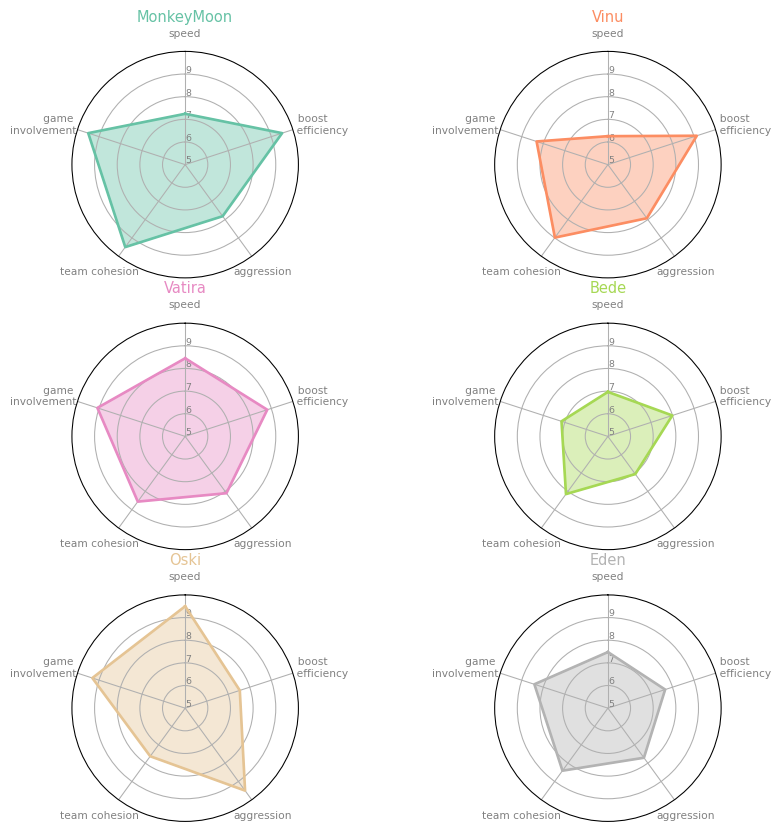

In [80]:
## radar plot code taken from github example and adapted for personal needs

from math import pi 
# Set data
df = pd.DataFrame({
'group': ['MonkeyMoon','Vinu','Vatira', 'Bede', 'Oski', 'Eden'],
"""speed""": [speed_df[speed_df.index == 'monkeymoon'].speed
, speed_df[speed_df.index == 'vinu'].speed
, speed_df[speed_df.index == 'vati'].speed
, speed_df[speed_df.index == 'boay'].speed
, speed_df[speed_df.index == 'oski'].speed
, speed_df[speed_df.index == 'eden'].speed
],
"""  boost 
       efficiency""": [    boost_efficiency_df[boost_efficiency_df.index == 'monkeymoon'].boost_efficiency
,     boost_efficiency_df[boost_efficiency_df.index == 'vinu'].boost_efficiency
,     boost_efficiency_df[boost_efficiency_df.index == 'vati'].boost_efficiency
,     boost_efficiency_df[boost_efficiency_df.index == 'boay'].boost_efficiency
,     boost_efficiency_df[boost_efficiency_df.index == 'oski'].boost_efficiency
,     boost_efficiency_df[boost_efficiency_df.index == 'eden'].boost_efficiency
],
"""aggression""": [    aggression_df[aggression_df.index == 'monkeymoon'].aggression
,     aggression_df[aggression_df.index == 'vinu'].aggression
,     aggression_df[aggression_df.index == 'vati'].aggression
,     aggression_df[aggression_df.index == 'boay'].aggression
,     aggression_df[aggression_df.index == 'oski'].aggression
,     aggression_df[aggression_df.index == 'eden'].aggression
],
"""team cohesion     """: [    team_cohesion_df[team_cohesion_df.index == 'monkeymoon'].team_cohesion
,     team_cohesion_df[team_cohesion_df.index == 'vinu'].team_cohesion
,     team_cohesion_df[team_cohesion_df.index == 'vati'].team_cohesion
,     team_cohesion_df[team_cohesion_df.index == 'boay'].team_cohesion
,     team_cohesion_df[team_cohesion_df.index == 'oski'].team_cohesion
,     team_cohesion_df[team_cohesion_df.index == 'eden'].team_cohesion
],
"""   game    
involvement          """: [    game_involvement_df[game_involvement_df.index == 'monkeymoon'].game_involvement
, game_involvement_df[game_involvement_df.index == 'vinu'].game_involvement
, game_involvement_df[game_involvement_df.index == 'vati'].game_involvement
, game_involvement_df[game_involvement_df.index == 'boay'].game_involvement
, game_involvement_df[game_involvement_df.index == 'oski'].game_involvement
, game_involvement_df[game_involvement_df.index == 'eden'].game_involvement]
})
  
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5,6,7,8,9], ['1',"2",'3',"4",'5',"6",'7', "8",'9'], color="grey", size=7)
    plt.ylim(5,10)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap('Set2', len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df['group'][row], color=my_palette(row))

In [78]:
pros = pros.T

In [79]:
pros

,oski,vati,monkeymoon,boay,vinu,eden
shots,3.000000,2.968750,3.288538,2.263158,1.794118,2.300000
goals,0.818462,0.770833,0.877470,1.000000,0.558824,0.700000
saves,1.258462,1.544271,1.984190,1.000000,1.176471,0.880000
assists,0.495385,0.627604,0.612648,0.263158,0.470588,0.480000
score,356.544615,384.794271,451.418972,298.684211,274.029412,302.180000
bcpm,497.376185,435.693972,422.106681,383.246965,369.229747,437.948231
avg_amount,47.051446,51.442031,51.636206,47.414737,50.387647,49.261600
amount_collected,2706.264615,2436.658854,2512.790514,2145.000000,2061.411765,2309.500000
amount_stolen,672.058462,559.830729,548.011858,407.315789,530.382353,403.220000
amount_collected_big,1946.938462,1719.278646,1697.126482,1530.368421,1341.705882,1677.840000
